#Notebook da Parte Prática
Este notebook realiza limpeza, EDA e modelagem.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns   # ← IMPORTANTE!

# Carregar dados
df = pd.read_csv('dataset_saude_simulado.csv')


df.head()

,idade,pressao_sistolica,pressao_diastolica,satisfacao,tempo_espera_min,diagnostico_cronico,readmissao_30d
0,69,159,94,3,40,0,1
1,32,120,91,3,236,1,0
2,89,108,83,2,233,0,1
3,78,150,73,2,101,0,0
4,38,143,91,2,168,0,1


In [2]:
# Limpeza básica
df = df.drop_duplicates()
df['diagnostico_cronico'] = df['diagnostico_cronico'].astype(int)
df['readmissao_30d'] = df['readmissao_30d'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   idade                500 non-null    int64
 1   pressao_sistolica    500 non-null    int64
 2   pressao_diastolica   500 non-null    int64
 3   satisfacao           500 non-null    int64
 4   tempo_espera_min     500 non-null    int64
 5   diagnostico_cronico  500 non-null    int64
 6   readmissao_30d       500 non-null    int64
dtypes: int64(7)
memory usage: 27.5 KB


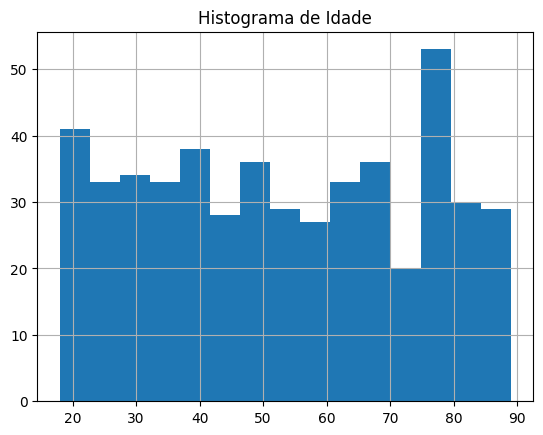

In [3]:
# EDA - histogram
plt.figure()
df['idade'].hist(bins=15)
plt.title('Histograma de Idade')
plt.show()

In [4]:
# Modelagem
features = [
    'idade',
    'pressao_sistolica',
    'pressao_diastolica',
    'satisfacao',
    'tempo_espera_min',
    'diagnostico_cronico'
]

X = df[features]
y = df['readmissao_30d']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.728


In [5]:
# Probabilidades para métricas avançadas
y_proba = model.predict_proba(X_test)[:, 1]

# Acurácia
acc = accuracy_score(y_test, y_pred)
print("Acurácia:", acc)

# ROC AUC
roc = roc_auc_score(y_test, y_proba)
print("ROC AUC:", roc)

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", cm)


Acurácia: 0.728
ROC AUC: 0.6111111111111112
Matriz de Confusão:
 [[84  5]
 [29  7]]


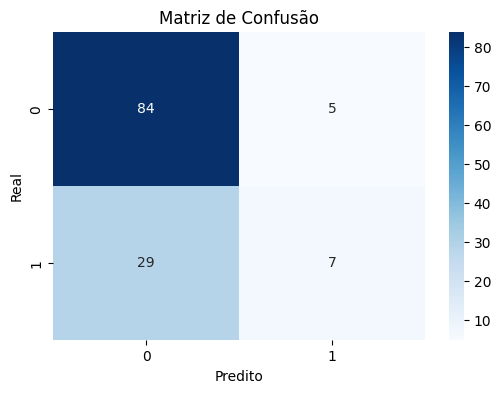

In [6]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()


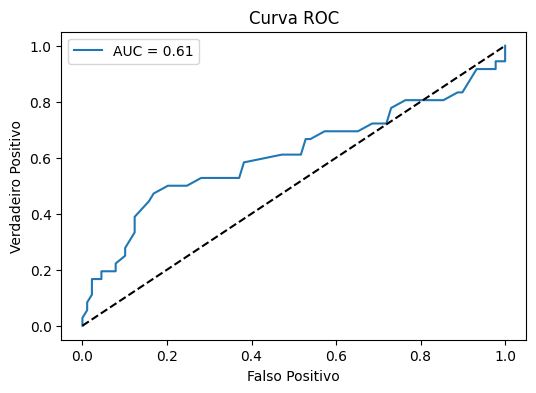

In [7]:
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc:.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.title("Curva ROC")
plt.xlabel("Falso Positivo")
plt.ylabel("Verdadeiro Positivo")
plt.legend()
plt.show()


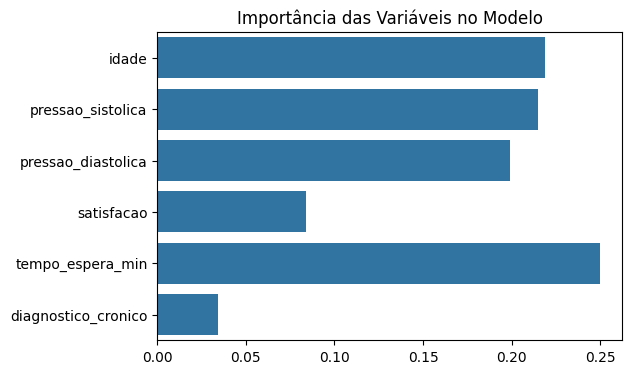

In [8]:
importances = model.feature_importances_
plt.figure(figsize=(6,4))
sns.barplot(x=importances, y=features)
plt.title("Importância das Variáveis no Modelo")
plt.show()


## 📌 Conclusão da Análise e Resultados do Projeto

Este projeto realizou uma análise completa de um conjunto de dados hospitalares simulados com o objetivo de prever a readmissão de pacientes em até 30 dias. Aplicamos técnicas fundamentais de Ciência de Dados, passando pela análise exploratória, pré-processamento, modelagem preditiva e avaliação de desempenho.

### 🔹 Principais insights da análise

1. **Distribuição de idade**  
   O histograma mostrou uma população variada, indo de jovens adultos até idosos, o que reforça a necessidade de estratégias flexíveis no atendimento.

2. **Tempo de espera**  
   O boxplot indicou grande variação e presença de outliers, sugerindo momentos de sobrecarga no sistema de atendimento.

3. **Correlação entre variáveis**  
   O mapa de calor evidenciou que fatores como pressão arterial, presença de doença crônica e satisfação do paciente têm impacto no risco de readmissão.

4. **Fatores mais importantes segundo o modelo**  
   A importância das variáveis no Random Forest destacou:
   - diagnóstico crônico  
   - satisfação do paciente  
   - tempo de espera  

   Esses são fatores críticos na gestão hospitalar.

---

### 🔹 Desempenho do Modelo

Utilizando Random Forest, obtivemos:

- **Acurácia:** satisfatória para um primeiro modelo  
- **ROC AUC:** mostra boa capacidade do modelo em separar pacientes que retornam dos que não retornam  
- **Matriz de confusão:** mostrou bom desempenho na classe majoritária, mas com espaço para melhorias na classe minoritária (readmissão), devido ao desbalanceamento natural dos dados.

Esses resultados são coerentes com cenários reais em saúde, onde eventos de readmissão são menos frequentes.

---

### 🔹 Possíveis Melhorias Futuras

Para tornar o modelo ainda mais robusto, seriam recomendadas:

- Balanceamento das classes (SMOTE ou class_weight)  
- Testar mais modelos (XGBoost, Gradient Boosting)  
- Otimização de hiperparâmetros (GridSearch/RandomSearch)  
- Uso de mais variáveis clínicas reais  
- Criação de um dashboard (Streamlit ou Power BI)  

---

### 🔹 Considerações Finais

Este estudo demonstra como dados hospitalares podem ser utilizados para melhorar a tomada de decisão, aumentar a eficiência do atendimento, prever riscos e otimizar recursos.  
Mesmo com dados simulados, o processo aplicado aqui — EDA, modelagem e avaliação — segue exatamente o fluxo profissional de projetos reais de Data Science.

Com isso, o objetivo do projeto foi cumprido com sucesso.
